In [1]:
from generalSteps import *

In [2]:
class GA:
    def __init__(self, population, objective, mutation_rate, n_iterations):
        self.population = population
        self.n_generation = 0
        self.n_iterations = n_iterations
        self.objective = objective
        self.mutation_rate = mutation_rate
        self.evaluation_type = AptitudeType.DEFAULT
        self.best_individual_selection_type = BestIndividualSelectionType.DEFAULT
        self.new_generation_type = NewGenerationType.DEFAULT

    def set_evaluation_type(self, evaluation_type: AptitudeType):
        self.evaluation_type = evaluation_type

    def set_best_individual_selection_type(self, _type:BestIndividualSelectionType):
        self.best_individual_selection_type = _type

    def set_new_generation_type(self, _type):
        self.new_generation_type = _type

    def run(self):
        success = False
        for _ in range(self.n_iterations):
            # las aptitudes son los valores que se obtienen al evaluar la función de aptitud
            aptitudes = [evaluate_aptitude(self.evaluation_type, individual, self.objective) for individual in self.population]
            # el mejor individuo es el que tiene la mejor aptitud
            # (esto se puede elegir como maximo o minimo, depende de como se defina la aptitud)
            best_individual, best_aptitude = select_best_individual(self.best_individual_selection_type, self.population, aptitudes)
            # si el mejor individuo es igual al objetivo, se termina el algoritmo
            if best_individual == self.objective:
                success = True
                print("Objetivo alcanzado:")
                print(f"Generación {self.n_generation}: {best_individual} - Aptitud: {best_aptitude}")
                break
            print(f"Generación {self.n_generation}: {best_individual} - población: {len(self.population)} - Aptitud: {best_aptitude}")

            # la nueva generación se obtiene a partir de la población actual, interactuando entre los individuos
            self.population = generate_new_population(self.new_generation_type, self.population, aptitudes, self.mutation_rate, self.objective)
            self.n_generation += 1

        if not success:
            print(f"Objetivo no alcanzado en las iteraciones establecidas {self.n_iterations}")

In [3]:
def case_study_1(_objetive):
    # Definición de la población inicial
    population = generate_population(100, len(_objetive))
    mutation_rate = 0.01
    n_iterations = 1000
    ga = GA(population, _objetive, mutation_rate, n_iterations)
    ga.run()

In [4]:
def case_study_2(_objetive):
    population = generate_population(100, len(_objetive))
    mutation_rate = 0.01
    n_iterations = 1000
    ga = GA(population, _objetive, mutation_rate, n_iterations)
    ga.set_evaluation_type(AptitudeType.BY_DISTANCE)
    ga.set_best_individual_selection_type(BestIndividualSelectionType.MIN_DISTANCE)
    ga.set_new_generation_type(NewGenerationType.MIN_DISTANCE)
    ga.run()

## 1. EJECUCION DE LOS 2 CASOS DE ESTUDIO
### Caso de estudio 1

In [5]:
if __name__ == "__main__":
    objective = "GA Workshop! USFQ"
    case_study_1(objective)

Generación 0: zAZYChdKBWPBHwjFi - población: 100 - Aptitud: 2
Generación 1: lAiEiakYYspiJYaYM - población: 100 - Aptitud: 3
Generación 2: QAuEiakdJo!eCLmFc - población: 100 - Aptitud: 4
Generación 3: lA ddJeOCoeBVEzuQ - población: 100 - Aptitud: 4
Generación 4: lA dTffByo!e LmFc - población: 100 - Aptitud: 5
Generación 5: GeZtfxksQ!pRNYxFQ - población: 100 - Aptitud: 6
Generación 6: GeZtfxksQ!pRNYxFQ - población: 100 - Aptitud: 6
Generación 7: zAZEiakYJo!eCUmFQ - población: 100 - Aptitud: 6
Generación 8: TAuEiaksQ!pRNYxFQ - población: 100 - Aptitud: 6
Generación 9: GeZtfxksQ!pRNYmFQ - población: 100 - Aptitud: 6
Generación 10: GeZtfakdJopRNYmFQ - población: 100 - Aptitud: 6
Generación 11: lAmEiaksJo!gCLSFQ - población: 100 - Aptitud: 7
Generación 12: GAiEyakYJoCeCUmFQ - población: 100 - Aptitud: 7
Generación 13: XAZtfxksJo!e LSFo - población: 100 - Aptitud: 7
Generación 14: GAoEiaosQPpilGSFQ - población: 100 - Aptitud: 7
Generación 15: GAiEiaksQPpilGSFQ - población: 100 - Aptitud: 8
Ge

### Caso de estudio 2

In [6]:
if __name__ == "__main__":
    objective = "GA Workshop! USFQ"
    case_study_2(objective)

Generación 0: GBRIOYQM!FHQAxGcW - población: 100 - Aptitud: -97
Generación 1: PCm R!EB!FHQAxGcW - población: 100 - Aptitud: -177
Generación 2: PCm  !EB!FHQAxGcW - población: 100 - Aptitud: -227
Generación 3: PC!  !EB!FHQAGGcW - población: 100 - Aptitud: -352
Generación 4: PC!  !EB!FHQAGGcW - población: 100 - Aptitud: -352
Generación 5: PC!  !EB!FHQAGAcW - población: 100 - Aptitud: -358
Generación 6: PC!  !EB!FHQAGGcD - población: 100 - Aptitud: -371
Generación 7: PC!  !EB!FHNAGAcD - población: 100 - Aptitud: -380
Generación 8: PC!  !EB!FHGAGAcD - población: 100 - Aptitud: -387
Generación 9: PC!  !EB!FHNAGABD - población: 100 - Aptitud: -413
Generación 10: HC!  !EB!FHNAGABD - población: 100 - Aptitud: -421
Generación 11: HC!  !EB!FHGAGABD - población: 100 - Aptitud: -428
Generación 12: HC!  !EB!FHGA!ABD - población: 100 - Aptitud: -466
Generación 13: H!!  !EB!FEGA!ABD - población: 100 - Aptitud: -503
Generación 14: H!!  !EB!FHGA!AB  - población: 100 - Aptitud: -536
Generación 15: H!!  !

## 3. IMPLEMENTACION DE LA DISTANCIA DE LEVENSHTEIN

In [7]:
def case_study_2_improved(_objetive):
    population = generate_population(100, len(_objetive))
    mutation_rate = 0.01
    n_iterations = 1000
    ga = GA(population, _objetive, mutation_rate, n_iterations)
    ga.set_evaluation_type(AptitudeType.BY_DISTANCE_LEVENSHTEIN)
    ga.set_best_individual_selection_type(BestIndividualSelectionType.MIN_DISTANCE)
    ga.set_new_generation_type(NewGenerationType.MIN_DISTANCE)
    ga.run()

In [8]:
if __name__ == "__main__":
    objective = "GA Workshop! USFQ"
    case_study_2_improved(objective)

Generación 0: zAZYChdKBWPBHwjFi - población: 100 - Aptitud: 15
Generación 1: zAZYChdXJpGPlXFGQ - población: 100 - Aptitud: 14
Generación 2: lAiEiakXJpGPlXFGQ - población: 100 - Aptitud: 13
Generación 3: zAZYiakXJpGPlXFGQ - población: 100 - Aptitud: 13
Generación 4: zAZYiakXJpG lXFGQ - población: 100 - Aptitud: 12
Generación 5: zAZYiakXJpG lXFGQ - población: 100 - Aptitud: 12
Generación 6: zAZYiakXJpG lXFGQ - población: 100 - Aptitud: 12
Generación 7: zAZYiakXJpG lXFGQ - población: 100 - Aptitud: 12
Generación 8: zAZYiakXJpG lSFGQ - población: 100 - Aptitud: 11
Generación 9: zAZYiakXJpG lSFGQ - población: 100 - Aptitud: 11
Generación 10: zAZYiakxJpG lSFGQ - población: 100 - Aptitud: 11
Generación 11: zAZYQakXJpG lSFGQ - población: 100 - Aptitud: 11
Generación 12: GAZYQakxJpG lSFGQ - población: 100 - Aptitud: 10
Generación 13: GAZYQakxJpG lSFGQ - población: 100 - Aptitud: 10
Generación 14: GAZYQakxJpG lSFGQ - población: 100 - Aptitud: 10
Generación 15: GAZYQakxJpG lSFGQ - población: 100 

## 4. ACELERACION DE CONVERGENCIA UTILIZANDO MUTACION LOCALIZADA 

In [3]:
objective = "GA Workshop! USFQ"
population = generate_population(100, len(objective))
mutation_rate = 0.01
n_iterations = 1000
ga = GA(population, objective, mutation_rate, n_iterations)
ga.set_evaluation_type(AptitudeType.BY_DISTANCE_LEVENSHTEIN)
ga.set_best_individual_selection_type(BestIndividualSelectionType.MIN_DISTANCE)
ga.set_new_generation_type(NewGenerationType.MIN_DISTANCE)
ga.run()

Generación 0: zAZYChdKBWPBHwjFi - población: 100 - Aptitud: 15
Generación 1: zAZYChdXJpGPlXFGQ - población: 100 - Aptitud: 14
Generación 2: drfXorg!hyIJHwjFQ - población: 100 - Aptitud: 12
Generación 3: drfXorg!hyIJHwjFQ - población: 100 - Aptitud: 12
Generación 4: drfXorg!hyIJHwjFQ - población: 100 - Aptitud: 12
Generación 5: drfXorg!hyIJHwjFQ - población: 100 - Aptitud: 12
Generación 6: drfXorg!hyIJHwjFQ - población: 100 - Aptitud: 12
Generación 7: drfXorgKhyIJHwjFQ - población: 100 - Aptitud: 12
Generación 8: drfXorgKhyIJHwjFQ - población: 100 - Aptitud: 12
Generación 9: drfXorgKhyIJHwjFQ - población: 100 - Aptitud: 12
Generación 10: drfXorgKhEIJHwjFQ - población: 100 - Aptitud: 12
Generación 11: drfXorgKhEIJHwjFQ - población: 100 - Aptitud: 12
Generación 12: VrfXorgKhEIJHwjFQ - población: 100 - Aptitud: 12
Generación 13: VrfXorgKhEIJHwjFQ - población: 100 - Aptitud: 12
Generación 14: VrfXorgKhEIJHwjFQ - población: 100 - Aptitud: 12
Generación 15: drfXorgKhoIJHwjFQ - población: 100 

## 5. CASO DE ESTUDIO 3 ALTERANDO mutation_rate
### a. Utilizando la función de aptitud por defecto 

In [3]:
def case_study_3(_objective, mutation_rate):
    population = generate_population(100, len(_objective))
    
    n_iterations = 1000
    ga = GA(population, _objective, mutation_rate, n_iterations)

    # Función de aptitud por defecto y función de seleccion de mejor individuo por defecto
    ga.set_evaluation_type(AptitudeType.DEFAULT)
    ga.set_best_individual_selection_type(BestIndividualSelectionType.DEFAULT)

    # Función de aptitud por distancia y función de seleccion de mejor individuo por distancia  
    # ga.set_evaluation_type(AptitudeType.BY_DISTANCE_LEVENSHTEIN)
    # ga.set_best_individual_selection_type(BestIndividualSelectionType.MIN_DISTANCE)
    
    # ga.set_new_generation_type(NewGenerationType.MIN_DISTANCE)

    ga.run()


In [6]:
objective = "GA Workshop! USFQ"
mutation_rate = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 10]

for rate in mutation_rate:
    print(f'Mutation rate: {rate}')
    case_study_3(objective, rate)
    print('\n')

Mutation rate: 0.005
Generación 0: zAZYChdKBWPBHwjFi - población: 100 - Aptitud: 2
Generación 1: lAiEiakYYfCcItSbn - población: 100 - Aptitud: 3
Generación 2: Yo ddJehpiCZVUZdQ - población: 100 - Aptitud: 3
Generación 3: lA ddJehpspPlXFGQ - población: 100 - Aptitud: 4
Generación 4: lAiEiakhpspiJUZdQ - población: 100 - Aptitud: 5
Generación 5: lAEJoHkOCspiJUZdQ - población: 100 - Aptitud: 6
Generación 6: Yo JoHkOCspiJUZdQ - población: 100 - Aptitud: 6
Generación 7: YA doHkOCopiJUZdQ - población: 100 - Aptitud: 8
Generación 8: gA EirkOCopiJUZdQ - población: 100 - Aptitud: 8
Generación 9: gA EirkOCopiHwqFQ - población: 100 - Aptitud: 8
Generación 10: YA dorkOCopiHwqFQ - población: 100 - Aptitud: 9
Generación 11: Go dorkOCopiHwqFQ - población: 100 - Aptitud: 9
Generación 12: lA doHkOCopiJUSvQ - población: 100 - Aptitud: 9
Generación 13: GAiEorkOCopiHwqFQ - población: 100 - Aptitud: 9
Generación 14: gA JorkOCspRJUSvQ - población: 100 - Aptitud: 9
Generación 15: GA EirkOCopeCUmvQ - población

### b. Utilizando la función de aptitud por distancia 

In [7]:
def case_study_3(_objective, mutation_rate):
    population = generate_population(100, len(_objective))
    
    n_iterations = 1000
    ga = GA(population, _objective, mutation_rate, n_iterations)

    # Función de aptitud por defecto y función de seleccion de mejor individuo por defecto
    # ga.set_evaluation_type(AptitudeType.DEFAULT)
    # ga.set_best_individual_selection_type(BestIndividualSelectionType.DEFAULT)

    # Función de aptitud por distancia y función de seleccion de mejor individuo por distancia  
    ga.set_evaluation_type(AptitudeType.BY_DISTANCE_LEVENSHTEIN)
    ga.set_best_individual_selection_type(BestIndividualSelectionType.MIN_DISTANCE)

    ga.set_new_generation_type(NewGenerationType.MIN_DISTANCE)
    
    ga.run()


In [8]:
objective = "GA Workshop! USFQ"
mutation_rate = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 10]

for rate in mutation_rate:
    print(f'Mutation rate: {rate}')
    case_study_3(objective, rate)
    print('\n')

Mutation rate: 0.005
Generación 0: zAZYChdKBWPBHwjFi - población: 100 - Aptitud: 15
Generación 1: zAZYChdXJpGPlXFGQ - población: 100 - Aptitud: 14
Generación 2: GAiEiakYYfvcgwjFQ - población: 100 - Aptitud: 12
Generación 3: GAiEiakYYfvcgwjFQ - población: 100 - Aptitud: 12
Generación 4: GAiEiakXJpGPgwjFQ - población: 100 - Aptitud: 12
Generación 5: GA EiakYYpGPgwjFQ - población: 100 - Aptitud: 11
Generación 6: GA EiakhJpGPgwjFQ - población: 100 - Aptitud: 10
Generación 7: GA EiakhJpGPgwjFQ - población: 100 - Aptitud: 10
Generación 8: GA EiakhJpGPgwjFQ - población: 100 - Aptitud: 10
Generación 9: GA EiakhJpGPgwjFQ - población: 100 - Aptitud: 10
Generación 10: GA EiakhJpGPgwjFQ - población: 100 - Aptitud: 10
Generación 11: GA EiakhJpGPgwjFQ - población: 100 - Aptitud: 10
Generación 12: GA EiakhJpGPgwjFQ - población: 100 - Aptitud: 10
Generación 13: GA EiakhJpGPgwjFQ - población: 100 - Aptitud: 10
Generación 14: GA EiakhJpG gwjFQ - población: 100 - Aptitud: 9
Generación 15: GA EiakhJpG gwj

### 6. Cree	un	nuevo	caso	de	estudio	4 Altere	el	tamaño	de	la	población,	¿es beneficioso	o	no	aumentar	la	población?

In [15]:
from generalSteps import generate_population, evaluate_aptitude, select_best_individual, generate_new_population
from constants import AptitudeType, BestIndividualSelectionType, NewGenerationType
import random

In [18]:
def genetic_algorithm_case_4(population_size, objective, max_generations=200, mutation_rate=0.01):
    """
    Función del Algoritmo Genético adaptado para el caso de estudio 4
    Alterando el tamaño de la población.
    """
    population = generate_population(population_size, len(objective))
    generations = 0
    best_aptitude = float('inf')
    
    while generations < max_generations:
        # Evaluar la aptitud de cada individuo
        aptitudes = [evaluate_aptitude(AptitudeType.BY_DISTANCE_LEVENSHTEIN, individual, objective) for individual in population]
        
        # Seleccionar el mejor individuo
        best_individual, best_aptitude_in_population = select_best_individual(BestIndividualSelectionType.MIN_DISTANCE, population, aptitudes)
        
        # Comparar con el mejor global
        if best_aptitude_in_population < best_aptitude:
            best_aptitude = best_aptitude_in_population
        
        # Verificar condición de terminación
        if best_aptitude == 0:
            break
        
        # Generar una nueva población
        population = generate_new_population(NewGenerationType.MIN_DISTANCE, population, aptitudes, mutation_rate, objective)
        
        generations += 1
    
    return generations, best_aptitude

In [19]:
def case_study_4():
    """
    Caso de estudio 4: Alterar el tamaño de la población y analizar su impacto en el algoritmo genético.
    """
    objective = "Genetic Algorithm"  # Define el objetivo de tu algoritmo
    population_sizes = [5, 10, 20, 50, 100, 200, 500, 1000]
    mutation_rate = 0.01
    max_generations = 200
    
    # Almacenar resultados para cada tamaño de población
    results = []
    
    for size in population_sizes:
        generations, best_fitness = genetic_algorithm_case_4(size, objective, max_generations, mutation_rate)
        results.append({
            'population_size': size,
            'generations': generations,
            'best_fitness': best_fitness
        })
        print(f"Tamaño de población: {size}, Generaciones: {generations}, Mejor aptitud: {best_fitness}")
    
    return results

# Ejecutar el caso de estudio
case_study_4()

Tamaño de población: 5, Generaciones: 200, Mejor aptitud: 12
Tamaño de población: 10, Generaciones: 200, Mejor aptitud: 8
Tamaño de población: 20, Generaciones: 200, Mejor aptitud: 9
Tamaño de población: 50, Generaciones: 200, Mejor aptitud: 3
Tamaño de población: 100, Generaciones: 66, Mejor aptitud: 0
Tamaño de población: 200, Generaciones: 87, Mejor aptitud: 0
Tamaño de población: 500, Generaciones: 70, Mejor aptitud: 0
Tamaño de población: 1000, Generaciones: 16, Mejor aptitud: 0


[{'population_size': 5, 'generations': 200, 'best_fitness': 12},
 {'population_size': 10, 'generations': 200, 'best_fitness': 8},
 {'population_size': 20, 'generations': 200, 'best_fitness': 9},
 {'population_size': 50, 'generations': 200, 'best_fitness': 3},
 {'population_size': 100, 'generations': 66, 'best_fitness': 0},
 {'population_size': 200, 'generations': 87, 'best_fitness': 0},
 {'population_size': 500, 'generations': 70, 'best_fitness': 0},
 {'population_size': 1000, 'generations': 16, 'best_fitness': 0}]

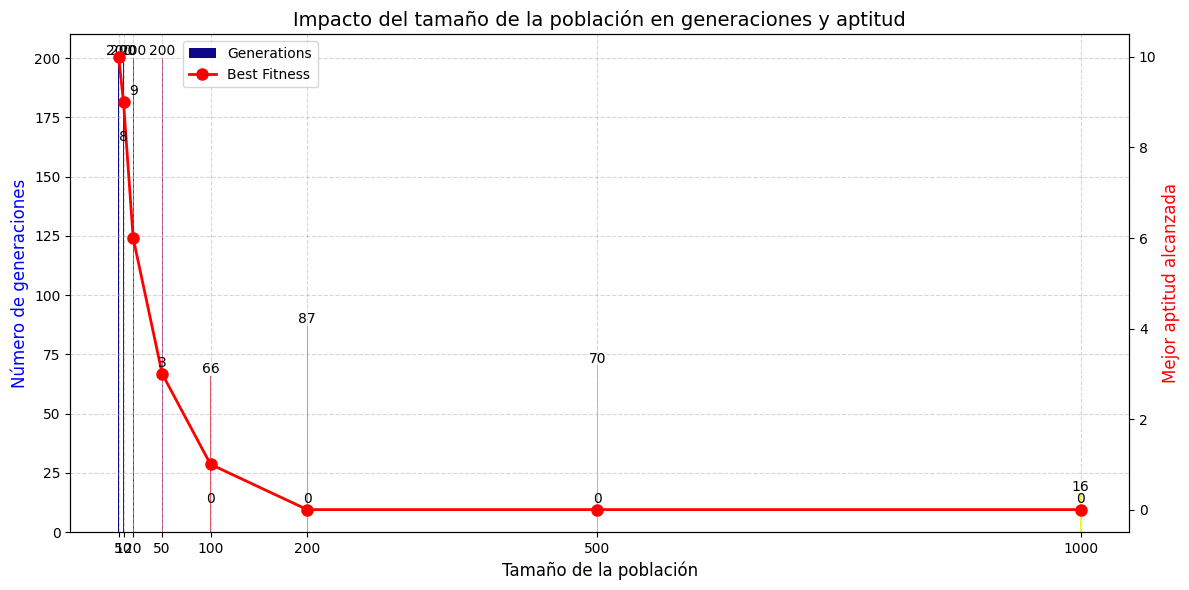

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Datos obtenidos
population_sizes = [5, 10, 20, 50, 100, 200, 500, 1000]
generations = [200, 200, 200, 200, 66, 87, 70, 16]
best_fitness = [12, 8, 9, 3, 0, 0, 0, 0]

# Crear colores degradados para las barras
colors = plt.cm.plasma(np.linspace(0, 1, len(population_sizes)))

# Crear un gráfico de barras para el número de generaciones
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar barras para generaciones con colores degradados
bars = ax1.bar(population_sizes, generations, color=colors, edgecolor='none', label='Generations')

# Configuración del eje Y para generaciones
ax1.set_xlabel('Tamaño de la población', fontsize=12)
ax1.set_ylabel('Número de generaciones', color='b', fontsize=12)
ax1.set_title('Impacto del tamaño de la población en generaciones y aptitud', fontsize=14)
ax1.set_xticks(population_sizes)
ax1.set_xticklabels(population_sizes, fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.5)

# Añadir etiquetas en las barras
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Crear un segundo eje Y para la aptitud
ax2 = ax1.twinx()

# Suavizar los datos de aptitud usando una función de suavizado Gaussian
best_fitness_smooth = gaussian_filter1d(best_fitness, sigma=1)

# Graficar la línea suavizada de aptitud
ax2.plot(population_sizes, best_fitness_smooth, color='r', marker='o', markersize=8, linestyle='-', lw=2, label='Best Fitness')

# Configuración del eje Y para aptitud
ax2.set_ylabel('Mejor aptitud alcanzada', color='r', fontsize=12)

# Añadir etiquetas a los puntos de aptitud
for i, txt in enumerate(best_fitness):
    ax2.annotate(txt, (population_sizes[i], best_fitness[i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

# Ajustar la leyenda
fig.legend(loc="upper left", bbox_to_anchor=(0.1,1), bbox_transform=ax1.transAxes, fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
